# PyTorch Word note

In [1]:
import torch

#### torch 는 tensorflow와 비슷함
----------------

In [7]:
li_tensor = torch.tensor([[1,2],[3,4]])
li_tensor

tensor([[1, 2],
        [3, 4]])

#### torch 의 tensor의 속성값 확인
-----------

In [10]:
li_tensor.shape, li_tensor.size()
# 같음

(torch.Size([2, 2]), torch.Size([2, 2]))

#### torch를 numpy 배열로 바꾸기
----------

In [11]:
li_tensor.numpy()

array([[1, 2],
       [3, 4]])

In [23]:
print('arange', torch.arange(10))
print('ones', torch.ones(5),'\n', 
        'zeros', torch.zeros(5))
print('ones_like', torch.ones_like(li_tensor), '\n', 
        'zeros_like', torch.zeros_like(li_tensor))
                        # (arr), Tensor를 입력해야 한다.
print('linspace', torch.linspace(0,10,5))
print('logspace',torch.logspace(0, 10,  5))

arange tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ones tensor([1., 1., 1., 1., 1.]) 
 zeros tensor([0., 0., 0., 0., 0.])
ones_like tensor([[1, 1],
        [1, 1]]) 
 zeros_like tensor([[0, 0],
        [0, 0]])
linspace tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
logspace tensor([1.0000e+00, 3.1623e+02, 1.0000e+05, 3.1623e+07, 1.0000e+10])


#### 난수 생성하기
----------

In [27]:
torch.manual_seed(7777)
# tf.random.set_seed(7777)

In [28]:
a = torch.rand(5)#균등분포
b = torch.randn(5)#Normal 분포 
c = torch.randint(10, size=(5,))
                            # size는 (tuple)로 넣어주어야 한다.
print(a, b, c, sep="\n")

tensor([0.7453, 0.7328, 0.2350, 0.8423, 0.8364])
tensor([ 0.2238,  0.2423,  0.8459,  0.6961, -0.8149])
tensor([9, 5, 6, 0, 7])


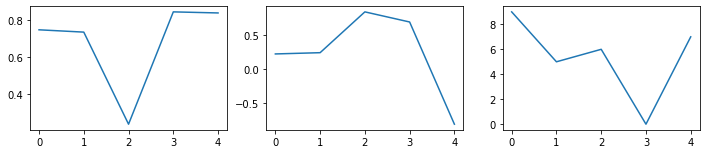

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(231)
plt.plot(a)
plt.subplot(232)
plt.plot(b)
plt.subplot(233)
plt.plot(c)
plt.show()

#### 데이터 타입
-----------

In [91]:
torch.randint(10, size=(5,), dtype=torch.float32)
                            # tf 때와 같음
            # 10까지의 숫자중
                    # 5개를
        # 무작위로 뽑기
                            # torch.float32 데이터 타입으로

tensor([7., 0., 4., 6., 0.])

`tensor_var.type()` -> inplace 명령이 아님

In [92]:
a = torch.randint(10, size=(5,))
print(a.dtype)

print(a.type(torch.float32))    # print는 형식으로 보여주지만, 
print(a.dtype)                  # 해당 값이 저장되지는 않음.

a = a.type(torch.float64)       # 갱신해 주어야 한다.
print(a.dtype)

torch.int64
tensor([4., 6., 7., 2., 1.])
torch.int64
torch.float64


#### GPU 사용하기
------------

GPU 를 사용하기 위해 Cuda에서 사용하는 데이터타입으로 바꾸어줘야 한다. 

방법 세가지! 

 - 만들 때, device 설정해두기
 - tensor_var.cuda()
 - tensor_var.to(device)


> `만들 때, device 설정해두기`

In [ ]:
# device 설정하기.
x = torch.ones(2, 2, device='cuda')

# 여러개 중에 하나의 GPU에 할당하고 싶을 때
# 번호는 nvidia-smi 명령을 Shell에 입력해서 찾을 수 있음 
x = torch.ones(2, 2, device='cuda:0')

# device 객체를 입력하는게 기본
x = torch.ones(2, 2, device=torch.device('cuda'))

AssertionError: Torch not compiled with CUDA enabled

> `tensor_var.cuda()`

In [ ]:
# .cuda()
a = torch.rand(10)
print(a)

a = a.cuda()
print(a)

tensor([0.9787, 0.2532, 0.9973, 0.1773, 0.2655, 0.0740, 0.4339, 0.8307, 0.0894,
        0.1826])


AssertionError: Torch not compiled with CUDA enabled

> `tensor_var.to(device)`

In [ ]:
# .to(device)
a = torch.rand(2)
print(a)

a = a.to("cuda")
print(a)

tensor([0.2865, 0.2110])


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
a = torch.rand(2)
print(a)

a = a.to(torch.device("cuda"))
print(a)

tensor([0.5899, 0.1865])


AssertionError: Torch not compiled with CUDA enabled

> 대부분 그냥 이렇게 사용합니다! 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

a = torch.rand(2)
print(a)

a = a.to(device)
print(a)

cpu
tensor([0.4578, 0.2209])
tensor([0.4578, 0.2209])
